In [71]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Example Loading and Manipulating ECO Mocks

In [72]:
## Load a mock

In [73]:
# get path to mocks
import os
cwd = os.getcwd()
data_path = os.path.abspath(os.path.join(os.path.dirname(cwd), 'mocks')) + '/'

In [74]:
from astropy.table import Table
mock = Table.read(data_path + 'mock_1a.hdf5', path='data')

## Plot Some Relations

Create a corner plot of most of the properties in the mock.

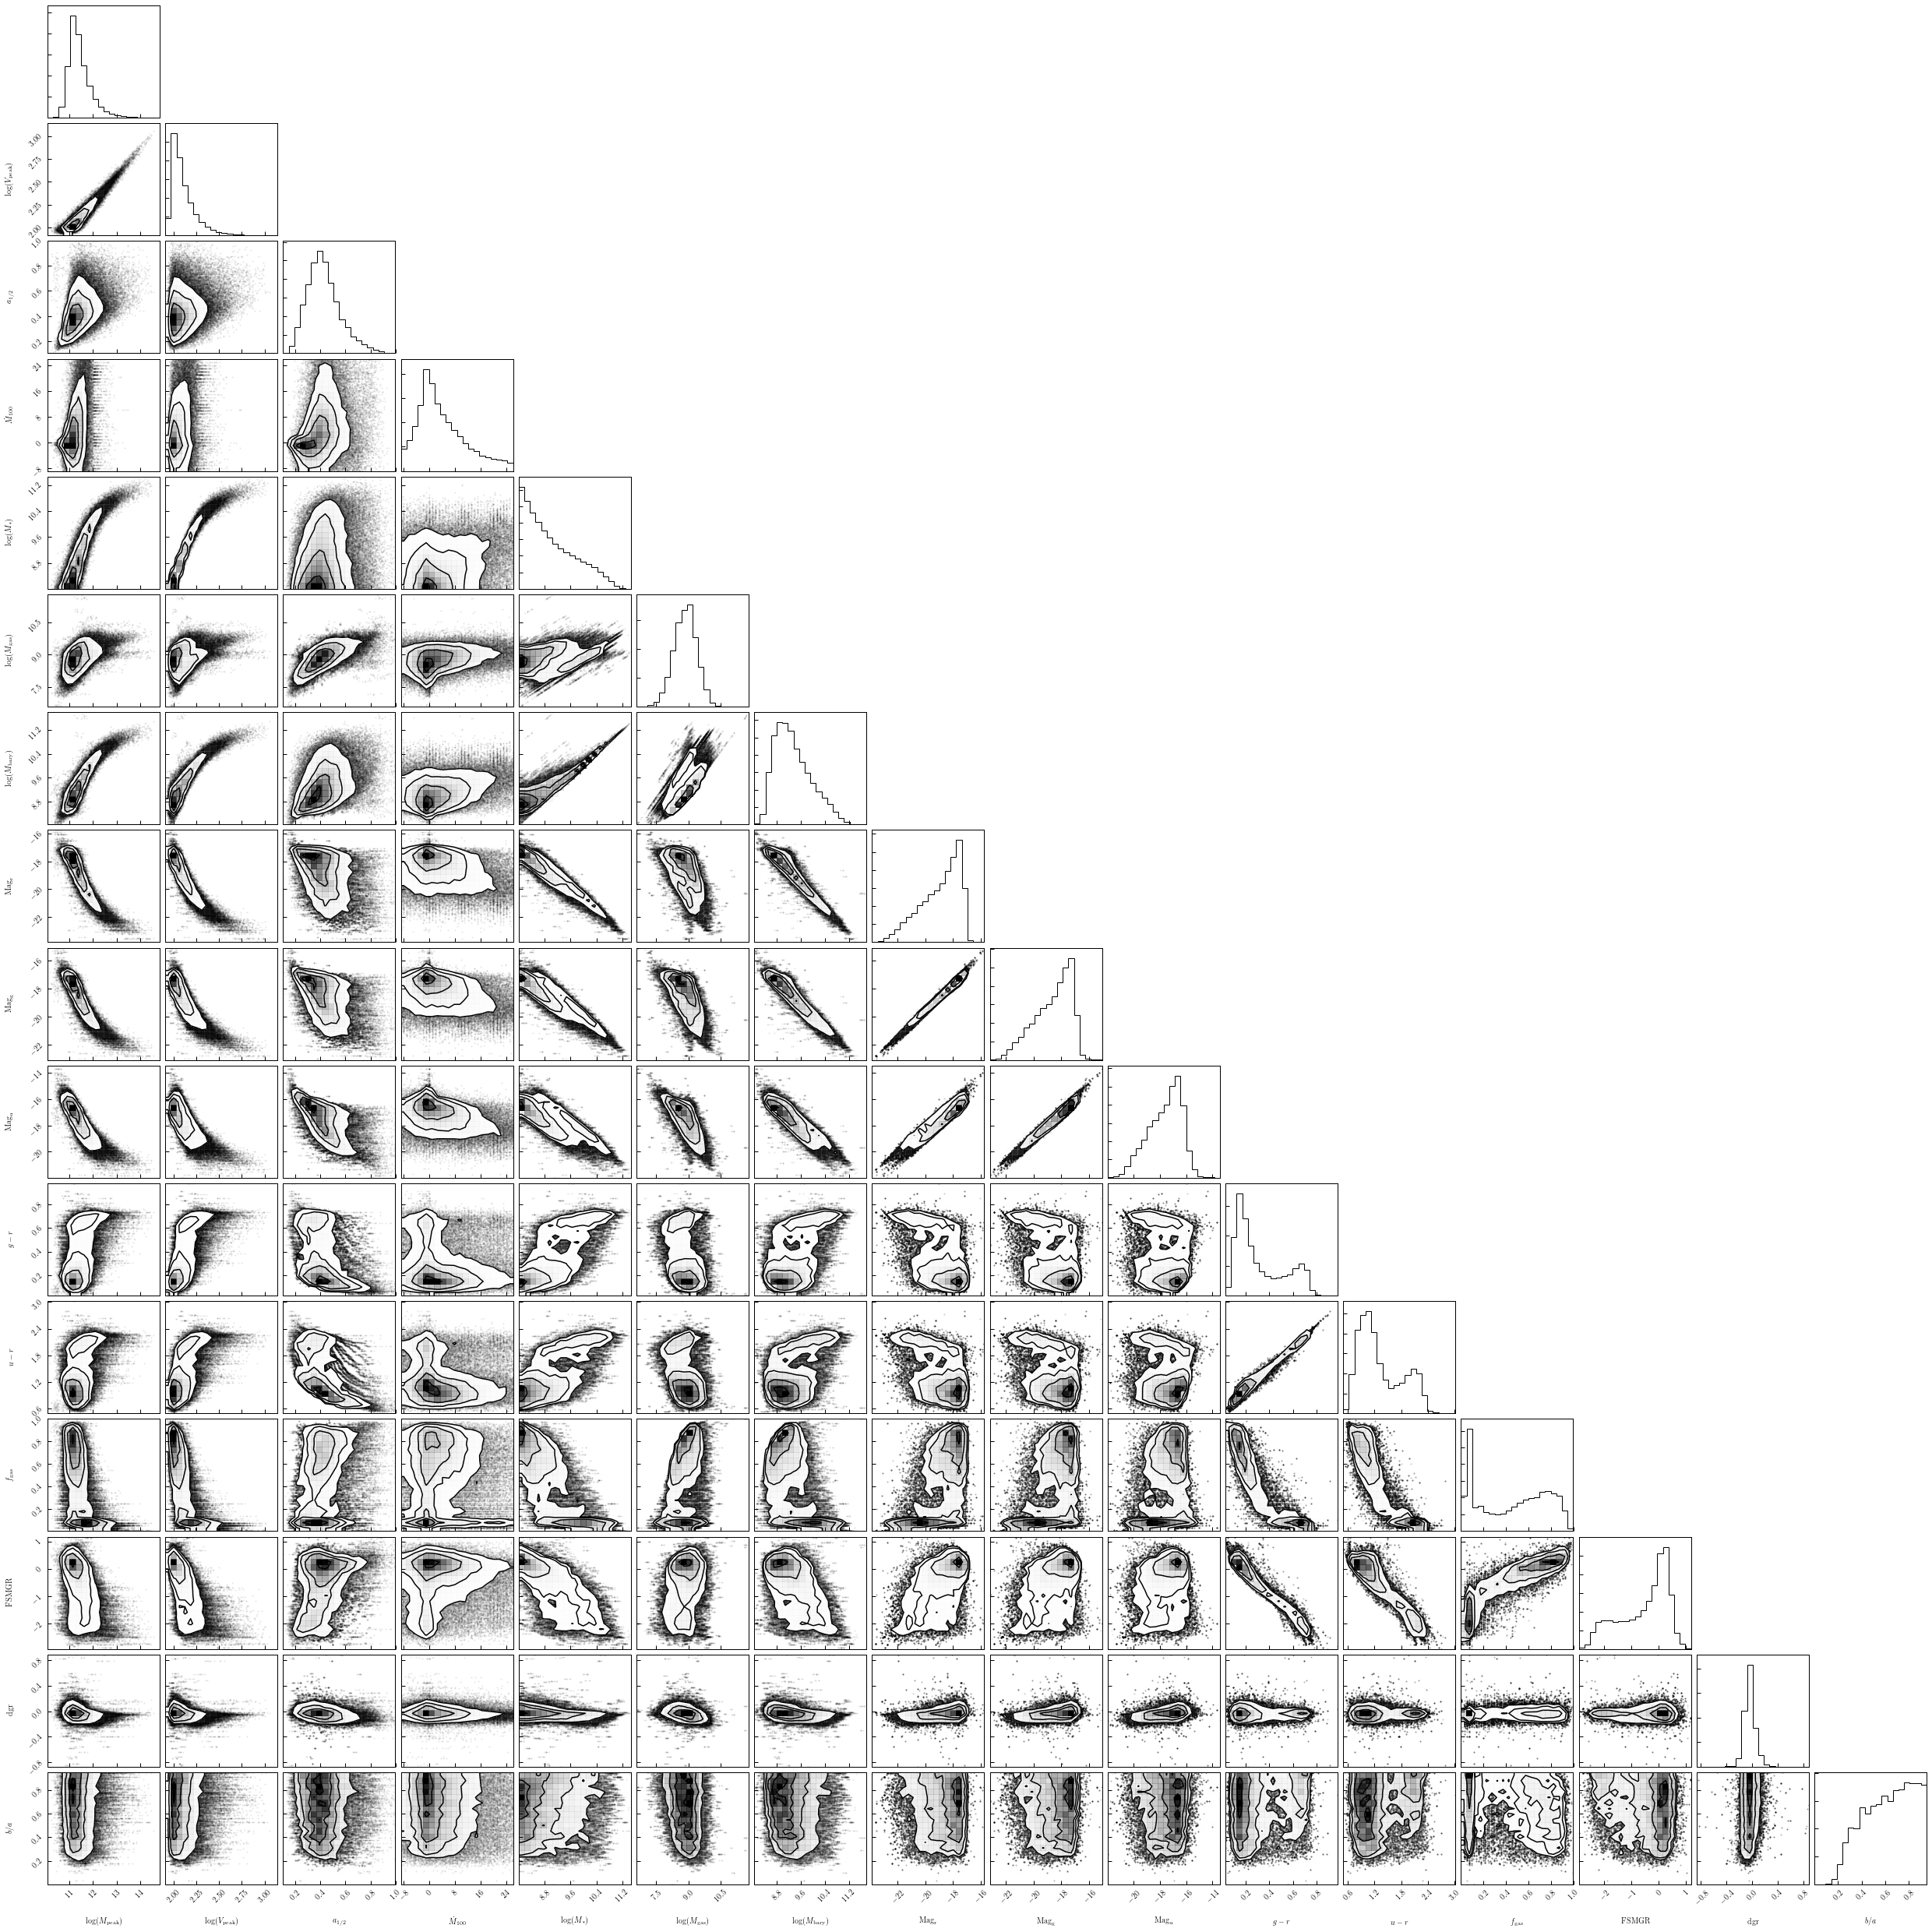

In [75]:
import corner

values = np.stack((np.log10(mock['halo_mpeak']),
                   np.log10(mock['halo_vpeak']),
                   mock['halo_half_mass_scale'],
                   mock['halo_acc_rate_100myr'],
                   np.log10(mock['stellar_mass']),
                   np.log10(mock['gas_mass']),
                   np.log10(mock['baryonic_mass']),
                   mock['abs_rmag'],
                   mock['abs_gmag'],
                   mock['abs_umag'],
                   mock['g_minus_r'],
                   mock['u_minus_r'],
                   mock['fgas'],
                   mock['fsmgr'],
                   mock['dgr'],
                   mock['b_to_a']
                  )).T

labels = [r'$\log(M_{\rm peak})$', r'$\log(V_{\rm peak})$', r'$a_{1/2}$', r'$\dot{M}_{100}$',
          r'$\log(M_*)$', r'$\log(M_{\rm gas})$', r'$\log(M_{\rm bary})$',
          r'${\rm Mag}_{\rm r}$', r'${\rm Mag}_{\rm g}$', r'${\rm Mag}_{\rm u}$',
          r'$g-r$', r'$u-r$',
          r'$f_{\rm gas}$', r'${\rm FSMGR}$', r'${\rm dgr}$', r'$b/a$'] 
lims = np.ones(len(labels))
lims[3] = 0.68
fig = corner.corner(values, labels=labels, range=lims)

savepath = cwd + '/figures/'
filename = 'example_corner_plot.pdf'
fig.savefig(savepath + filename, dpi=250)

Examine a subset of correlations in detail.

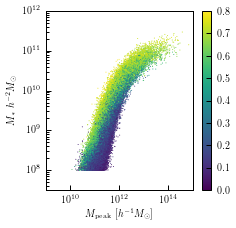

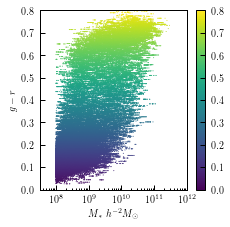

In [82]:
# plot SMHM relation
plt.figure(figsize=(3.3,3.3))
plt.scatter(mock['halo_mpeak'], mock['stellar_mass'],
            c=mock['g_minus_r'], s=1, lw=0, vmin=0.0, vmax=0.8)
plt.ylabel(r'$M_{*}~h^{-2}M_{\odot}$')
plt.ylim([10**7.5,10**12.0])
plt.xlim([10**9,10**15])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M_{\rm peak}~[h^{-1}M_{\odot}]$')
plt.colorbar()
plt.show()

# plot stellar mass vs color
plt.figure(figsize=(3.3,3.3))
plt.scatter(mock['stellar_mass'], mock['g_minus_r'],
            c=mock['g_minus_r'], s=1, lw=0, vmin=0.0, vmax=0.8)
plt.xlabel(r'$M_{*}~h^{-2}M_{\odot}$')
plt.xlim([10**7.5,10**12.0])
plt.ylim([0,0.8])
plt.xscale('log')
plt.ylabel(r'$g-r$')
plt.colorbar()
plt.show()

## Clustering

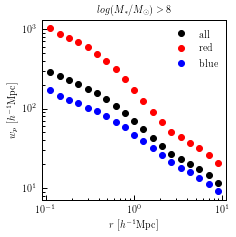

In [83]:
# calculate TPCF
from halotools.mock_observables import wp, return_xyz_formatted_array

rp_bins = np.logspace(-1,1,20)
rp_bin_centers = (rp_bins[:-1]+rp_bins[1:])/2.0

mask = (np.log10(mock['stellar_mass'])>=8)
red = mock['g_minus_r']>0.5
blue = mock['g_minus_r']<=0.5

# get coordinates in redhsift space and in halotools mock observable format
coords =  return_xyz_formatted_array(mock['x'], mock['y'], mock['z'], velocity=mock['vx'],
                                     period=130.0, velocity_distortion_dimension='z')

# calculate for three samples
result_all = wp(coords[mask], rp_bins=rp_bins, pi_max=40.0, period=130.0)
result_red = wp(coords[red&mask], rp_bins=rp_bins, pi_max=40.0, period=130.0)
result_blue = wp(coords[blue&mask], rp_bins=rp_bins, pi_max=40.0, period=130.0)

plt.figure(figsize=(3.3,3.3))
p1, = plt.plot(rp_bin_centers, result_all, 'o', color='black')
p2, = plt.plot(rp_bin_centers, result_red, 'o', color='red')
p3, = plt.plot(rp_bin_centers, result_blue, 'o', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$w_p ~ [h^{-1}{\rm Mpc}]$')
plt.xlabel(r'$r ~ [h^{-1}{\rm Mpc}]$')
plt.title(r'$log(M_*/M_{\odot}) > 8$')
plt.legend([p1,p2,p3], ['all', 'red', 'blue'], frameon=False, loc='upper right', fontsize=10, numpoints=1)
plt.show()

In [84]:
mock

halo_upid,halo_hostid,halo_mpeak,halo_x,halo_y,halo_id,halo_z,halo_vx,halo_vy,halo_vz,halo_acc_rate_100myr,halo_rvir,halo_vpeak,halo_mvir,halo_half_mass_scale,halo_mvir_host_halo,x,y,z,vx,vy,vz,galid,bijected_b_to_a,stellar_mass,abs_umag,abs_gmag,b_to_a,num_morph_type,fgas,fsmgr,gas_mass,g_minus_r,u_minus_r,baryonic_mass,dgr,abs_rmag,bijected_fgas,reference_idx
int64,int64,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
-1,9461448171,1575000000000.0,4.24927,2.47562,9461448171,9.02274,14.84,121.73,81.09,17.97,0.300256,214.4,1573000000000.0,0.53219,1573000000000.0,4.24927,2.47562,9.02274,14.84,121.73,81.09,0,1.4709385559594497,26646824499.2358,-19.59594,-20.984392999999997,0.8132,1.0,0.09842835856911332,-1.809228626184906,2909145625.27317,0.627607,2.01606,29555970124.508972,-0.0676231,-21.612,-2.214810549249114,3080
-1,9461448043,1477000000000.0,2.17009,4.51159,9461448043,0.53427,-36.8,150.68,-55.54,92.03,0.294004,218.45,1477000000000.0,0.48185,1477000000000.0,2.17009,4.51159,0.53427,-36.8,150.68,-55.54,1,1.5464471678152878,12988915414.038233,-19.3247,-20.618281,0.8244,1.0,0.05594086761220659,-1.2054283091685365,769667039.568863,0.517719,1.8113,13758582453.607096,-0.142902,-21.136,-2.8258936070788043,12648
-1,9461448327,1451000000000.0,9.4685,11.26059,9461448327,1.01024,39.61,290.66,-129.78,62.03,0.29225102,184.24,1451000000000.0,0.76666,1451000000000.0,9.4685,11.26059,1.01024,39.61,290.66,-129.78,2,0.6212377362786948,17555616524.51554,-20.650730000000003,-21.569929000000002,0.6505,0.0,0.2349145608286255,-0.35596536418503383,5390339084.741831,0.258871,1.17807,22945955609.25737,-0.117735,-21.8288,-1.1807656356873475,4446
-1,9461448697,587100000000.0,4.70862,0.38812,9461448697,11.75625,48.24,64.57,165.99,11.3,0.216086,171.57,586500000000.0,0.37544,586500000000.0,4.70862,0.38812,11.75625,48.24,64.57,165.99,3,2.923583165885601,14094888382.772306,-18.81134,-20.323847,0.949,1.0,0.03394998687692626,-2.092991946310801,495337994.02360463,0.699953,2.21246,14590226376.795912,-0.0113869,-21.0238,-3.348327138828221,10420
9461448327,9461448327,765900000000.0,9.43466,11.3238,9461448330,0.99281,143.7,551.52,-102.18,446.9,0.212137,141.08,554900000000.0,0.87256,1451000000000.0,9.43466,11.3238,0.99281,143.7,551.52,-102.18,4,1.4650247864644452,2622039014.295444,-20.344772,-20.9449383,0.8123,-1.0,0.9587881001999945,1.1270950752451774,61001308296.06306,0.0440617,0.644228,63623347310.3585,-0.16198868095721564,-20.989,3.146943046594962,9479
-1,9461448672,516700000000.0,2.91847,1.60557,9461448672,0.36271,39.65,156.97,-71.46,36.61,0.207157,150.81,516700000000.0,0.42337,516700000000.0,2.91847,1.60557,0.36271,39.65,156.97,-71.46,5,-0.817474576552526,3943950431.955659,-17.97697,-19.121334,0.3063,0.0,0.09842835856911332,-1.1636182776215171,430577615.19565237,0.482166,1.62653,4374528047.151311,-0.0862083,-19.6035,-2.214810549249114,8321
-1,9461448686,446700000000.0,4.40623,2.36269,9461448686,7.77823,-18.61,133.96,65.24,41.74,0.197342,141.55,446700000000.0,0.42632,446700000000.0,4.40623,2.36269,7.77823,-18.61,133.96,65.24,6,-0.38716481366353767,1741628648.4393575,-18.32555,-19.282600000000002,0.4044,0.0,0.5376163505175289,-0.32775339857828406,2025002482.2000973,0.2612,1.21825,3766631130.639455,0.0967331,-19.5438,0.15075024603831924,9736
-1,9461448875,323100000000.0,0.38477,0.11761,9461448875,1.88271,-2.63,122.58,54.41,-6.289,0.176433,150.85,319200000000.0,0.40425,319200000000.0,0.38477,0.11761,1.88271,-2.63,122.58,54.41,7,-0.14545591459146437,4860785312.970008,-17.9574,-19.305539,0.4637,1.0,0.09842631526900342,-1.1245249064299432,530660106.62464803,0.536161,1.8843,5391445419.594656,-0.0172901,-19.8417,-2.214833575100043,5973
-1,9461448909,314900000000.0,5.52471,2.29524,9461448909,4.87725,-8.8,113.19,5.36,9.187,0.17557001,1